In [1]:
wikiLiquid2 = "https://liquipedia.net/leagueoflegends/LCK/2023/Summer/Statistics"
#202316
#201814
ListOfLink = ["https://liquipedia.net/leagueoflegends/LCK/2023/Summer/Statistics",
         "https://liquipedia.net/leagueoflegends/LCK/2022/Summer/Statistics",
       "https://liquipedia.net/leagueoflegends/LCK/2021/Summer/Statistics",
       "https://liquipedia.net/leagueoflegends/LCK/2020/Summer/Statistics",
       "https://liquipedia.net/leagueoflegends/LCK/2019/Summer/Statistics",
       "https://liquipedia.net/leagueoflegends/LCK/2018/Summer/Statistics",
                  "https://liquipedia.net/leagueoflegends/LCK/2023/Spring/Statistics",
         "https://liquipedia.net/leagueoflegends/LCK/2022/Spring/Statistics",
       "https://liquipedia.net/leagueoflegends/LCK/2021/Spring/Statistics",
       "https://liquipedia.net/leagueoflegends/LCK/2020/Spring/Statistics",
       "https://liquipedia.net/leagueoflegends/LCK/2019/Spring/Statistics",
       "https://liquipedia.net/leagueoflegends/LCK/2018/Spring/Statistics",
         "https://liquipedia.net/leagueoflegends/LPL/2023/Summer/Statistics",
         "https://liquipedia.net/leagueoflegends/LPL/2022/Summer/Statistics",
       "https://liquipedia.net/leagueoflegends/LPL/2021/Summer/Statistics",
       "https://liquipedia.net/leagueoflegends/LPL/2020/Summer/Statistics",
       "https://liquipedia.net/leagueoflegends/LPL/2019/Summer/Statistics",
       "https://liquipedia.net/leagueoflegends/LPL/2018/Summer/Statistics",
                  "https://liquipedia.net/leagueoflegends/LPL/2023/Spring/Statistics",
         "https://liquipedia.net/leagueoflegends/LPL/2022/Spring/Statistics",
       "https://liquipedia.net/leagueoflegends/LPL/2021/Spring/Statistics",
       "https://liquipedia.net/leagueoflegends/LPL/2020/Spring/Statistics",
       "https://liquipedia.net/leagueoflegends/LPL/2019/Spring/Statistics",
       "https://liquipedia.net/leagueoflegends/LPL/2018/Spring/Statistics",
                  "https://liquipedia.net/leagueoflegends/LCS/2023/Summer/Statistics",
         "https://liquipedia.net/leagueoflegends/LCS/2022/Summer/Statistics",
       "https://liquipedia.net/leagueoflegends/LCS/2021/Summer/Statistics",
       "https://liquipedia.net/leagueoflegends/LCS/2020/Summer/Statistics",
       "https://liquipedia.net/leagueoflegends/LCS/2019/Summer/Statistics",
       "https://liquipedia.net/leagueoflegends/LCS/North_America/2018/Summer/Statistics",
        "https://liquipedia.net/leagueoflegends/LCS/2023/Spring/Statistics",
         "https://liquipedia.net/leagueoflegends/LCS/2022/Spring/Statistics",
       "https://liquipedia.net/leagueoflegends/LCS/2021/Spring/Statistics",
       "https://liquipedia.net/leagueoflegends/LCS/2020/Spring/Statistics",
       "https://liquipedia.net/leagueoflegends/LCS/2019/Spring/Statistics",
       "https://liquipedia.net/leagueoflegends/LCS/North_America/2018/Spring/Statistics",
                  "https://liquipedia.net/leagueoflegends/LEC/2023/Summer/Statistics",
         "https://liquipedia.net/leagueoflegends/LEC/2022/Summer/Statistics",
       "https://liquipedia.net/leagueoflegends/LEC/2021/Summer/Statistics",
       "https://liquipedia.net/leagueoflegends/LEC/2020/Summer/Statistics",
       "https://liquipedia.net/leagueoflegends/LEC/2019/Summer/Statistics",
        "https://liquipedia.net/leagueoflegends/LEC/2023/Spring/Statistics",
         "https://liquipedia.net/leagueoflegends/LEC/2022/Spring/Statistics",
       "https://liquipedia.net/leagueoflegends/LEC/2021/Spring/Statistics",
       "https://liquipedia.net/leagueoflegends/LEC/2020/Spring/Statistics",
       "https://liquipedia.net/leagueoflegends/LEC/2019/Spring/Statistics",
                      "https://liquipedia.net/leagueoflegends/LEC/2023/Winter/Statistics"
             ]
    #   "https://liquipedia.net/leagueoflegends/LEC/North_America/2018/Summer/Statistics",
#"https://liquipedia.net/leagueoflegends/LEC/North_America/2018/Spring/Statistics",
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [2]:
import requests
from bs4 import BeautifulSoup
def liquipediaStats(url):
# Send a GET request to the webpage you want to scrape
    #url = "https://liquipedia.net/leagueoflegends/LPL/2023/Summer/Statistics"
    response = requests.get(url)
    if response.status_code == 404:
        print("404")
        return 404
    Season=[]
    Year=[]
    Area=[]
    Rank= []
    Win= []
    ScrappedChampions= []
    ScrappedRanks= []
    ScrappedWins= []
    ScrappedLose= []
    ScrappedWinpercentage= []
    Scrappedunknown1= []
    ScrappedblueSidePick= []
    ScrappedblueSideWin= []
    ScrappedblueSideLose= []
    ScrappedblueSidePercentage= []
    ScrappedredSidePick= []
    ScrappedredSideWin= []
    ScrappedredSideLose= []
    ScrappedredSidePercentage= []
    Scrappedbans= []
    ScrappedbanPercentage= []
    ScrappedtotalPickRate= []
    ScrappedtotalPickRatePercentage= []

    # Create a BeautifulSoup object by passing the response content and specifying the parser
    soup = BeautifulSoup(response.content, "html.parser")
    GetBanPart1=[]
    GetBanPart2=[]
    #print(soup)
    # Find and extract specific elements from the webpage
    paragraphs = soup.find_all('tr',class_="dota-stat-row")
    GetDate = soup.find('title').text

    # Split GetDate into words using space as a delimiter
    words = GetDate.split(" ")
 #ChatGpT Copied but i know how it works now ----------------------------------------------------------------------------------       
    # Check if there are at least three words
#    if len(words) >= 3:
    GetSeason = words[1]  # Assign the first word to Season
    GetYear = words[2]    # Assign the second word to Year
    GetArea = words[0]    # Assign the third word to Area
    ### What i learned
                #how does it know with len is bigger that 3 letters ??? #I read it wrong but only checks if the list is bigger than three
                #but i already done this part but it split words but it didnt split when i copy from CHatGPT maybe because of the wording ? 
                #Answer on my previous Mistake 
                        # GetDate.split(" ") <---- Change this to GetWord = GetDate.split(" ")
                    # Assign the second word to Year
                       # GetSeason = GetDate[0] <---- changet this to GetSeason= GetWord[0]
                        #GetYear =GetDate[2]<---- changet this to GetYear =GetWord[0]
                        #GetArea =GetDate[1]<---- changet this to GetArea = GetWord[0]                     
#------------------------------------------------------------------------------------------------------------------------
    # First Steps in Looping in paragraphs 
    # Loop the First TD -> 2nd Loop Go and find the stuff you want 
    # Doesn't work need to figure out another way to display this
    for t in paragraphs:
        bans = t.find_all('a',class_="internal text")
        #display(bans)
        GetBanPart1.extend(bans)

    #display(GetBanPart1)
    for BanRate in GetBanPart1:
        GetBanPart2.append(BanRate.text)
    #display(GetBanPart2)    #GetBanPart2(BanRate.Text)
    #-------------------------------------------------------------------------           
    for paragraph in paragraphs:
        #display(paragraph.find_all('td'))
        #display(len(paragraph))
        Champions =paragraph.find_all('a')[1]
        Ranks = paragraph.find_all('td')[0]
        Wins = paragraph.find_all('td')[3]
        Lose = paragraph.find_all('td')[4]
        Winpercentage = paragraph.find_all('td')[5]
        unknown1 = paragraph.find_all('td')[6]
        blueSidePick = paragraph.find_all('td')[7]
        blueSideWin = paragraph.find_all('td')[8]
        blueSideLose = paragraph.find_all('td')[9]
        blueSidePercentage = paragraph.find_all('td')[10]
        redSidePick = paragraph.find_all('td')[11]
        redSideWin = paragraph.find_all('td')[12]
        redSideLose = paragraph.find_all('td')[13]
        redSidePercentage = paragraph.find_all('td')[14]
        #display(len(paragraph)
        #---- 2018 doesn't have the bottom 4 
        if (len(paragraph)) == 22:
            #display('enough of list')
            bans = paragraph.find_all('td')[15]
            banPercentage = paragraph.find_all('td')[16]
            totalPickRate = paragraph.find_all('td')[17]
            totalPickRatePercentage=paragraph.find_all('td')[18]
            ScrappedtotalPickRatePercentage.append(totalPickRatePercentage.text.replace("%", ""))
            ScrappedbanPercentage.extend(banPercentage)
            ScrappedtotalPickRate.extend(totalPickRate)
            databig = True
        else:
            #display('out of index list')
            bans = []
            banPercentage =[]
            totalPickRate = []
            totalPickRatePercentage=[]
            databig = False
        Season.append(GetSeason)
        Year.append(GetYear)
        Area.append(GetArea)
        ScrappedChampions.extend(Champions)
        ScrappedRanks.extend(Ranks)
        ScrappedWins.extend(Wins)
        ScrappedLose.extend(Lose)
        ScrappedWinpercentage.append(Winpercentage.text.replace("%", ""))
        Scrappedunknown1.append(unknown1.text.replace("%", ""))
        ScrappedblueSidePick.extend(blueSidePick)
        ScrappedblueSideWin.extend(blueSideWin)
        ScrappedblueSideLose.extend(blueSideLose)
        ScrappedblueSidePercentage.append(blueSidePercentage.text.replace("%", ""))
        ScrappedredSidePick.extend(redSidePick)
        ScrappedredSideWin.extend(redSideWin)
        ScrappedredSideLose.extend(redSideLose)
        ScrappedredSidePercentage.append(redSidePercentage.text.replace("%", ""))
        #display(len(redSidePercentage.text.replace("%", "")))
        #Scrappedbans.extend(bans)
      #  display(redSidePercentage.text.replace("%", ""))

        #ScrappedtotalPickRatePercentage.append(totalPickRatePercentage.text.replace("%", ""))
        if not databig:
            data = {'Season':Season,'Year':Year,'Area':Area,'Ranks':ScrappedRanks,'Champions':ScrappedChampions,'Wins':ScrappedWins,'Lose':ScrappedLose,
               'PercentageWinRate':ScrappedWinpercentage,'PercentageAvailableGames':Scrappedunknown1,'BlueSidePick':ScrappedblueSidePick,
               'BlueSidePickWin':ScrappedblueSideWin,'BlueSidePickLose':ScrappedblueSideLose,'BlueSidePercentage':ScrappedblueSidePercentage,
                'RedSidePick':ScrappedredSideWin,'RedSidePickWin':ScrappedredSidePick,'RedSidePickLose':ScrappedredSideLose,
                'RedSidePickPercentage':ScrappedredSidePercentage#,'TotalPickRate':ScrappedtotalPickRate,'TotalPickPercentage':ScrappedtotalPickRatePercentage
               }
        else:
            data = {'Season':Season,'Year':Year,'Area':Area,'Ranks':ScrappedRanks,'Champions':ScrappedChampions,'Wins':ScrappedWins,'Lose':ScrappedLose,
               'PercentageWinRate':ScrappedWinpercentage,'PercentageAvailableGames':Scrappedunknown1,'BlueSidePick':ScrappedblueSidePick,
               'BlueSidePickWin':ScrappedblueSideWin,'BlueSidePickLose':ScrappedblueSideLose,'BlueSidePercentage':ScrappedblueSidePercentage,
                'RedSidePick':ScrappedredSideWin,'RedSidePickWin':ScrappedredSidePick,'RedSidePickLose':ScrappedredSideLose,
                'RedSidePickPercentage':ScrappedredSidePercentage,'TotalPickRate':ScrappedtotalPickRate,'TotalPickPercentage':ScrappedtotalPickRatePercentage
               }
    return data

In [3]:
def GetFullData(FullStatSpring):
#Filter Data that display with more that 10 bans
    pd.set_option('display.max_colwidth', None)
    DataliquipediaStatsSpring = pd.DataFrame(FullStatSpring)
    display(DataliquipediaStatsSpring)
#->Change Columns from String to Numberical
    DataliquipediaStatsSpring['Wins'] = pd.to_numeric(DataliquipediaStatsSpring['Wins'])
    DataliquipediaStatsSpring['Lose'] = pd.to_numeric(DataliquipediaStatsSpring['Lose'])
   # DataliquipediaStatsSpring['TotalPickRate'] = pd.to_numeric(DataliquipediaStatsSpring['TotalPickRate'])
#-> Add Columns
    DataliquipediaStatsSpring = DataliquipediaStatsSpring.assign(TotalGamesPlayed= DataliquipediaStatsSpring['Wins']+DataliquipediaStatsSpring['Lose'] )
   # DataliquipediaStatsSpring = DataliquipediaStatsSpring.assign(Ban= DataliquipediaStatsSpring['TotalPickRate']-DataliquipediaStatsSpring['TotalGamesPlayed'])
#-> Display Data
    if len(FullStatSpring)==14:
        DataliquipediaStatsSpring['TotalPickRate'] = pd.to_numeric(DataliquipediaStatsSpring['TotalPickRate'])
        DataliquipediaStatsSpring = DataliquipediaStatsSpring.assign(Ban= DataliquipediaStatsSpring['TotalPickRate']-DataliquipediaStatsSpring['TotalGamesPlayed'])   
            
    # Code to be executed if the condition is True

    return DataliquipediaStatsSpring.style
def GetSinglarChampion(FullStatSpring,Champion,League= None):
#Filter Data that display with more that 10 bans
    pd.set_option('display.max_colwidth', None)
    DataliquipediaStatsSpring = pd.DataFrame(FullStatSpring)
    #display(DataliquipediaStatsSpring)
#->Change Columns from String to Numberical
    DataliquipediaStatsSpring['Wins'] = pd.to_numeric(DataliquipediaStatsSpring['Wins'])
    DataliquipediaStatsSpring['Lose'] = pd.to_numeric(DataliquipediaStatsSpring['Lose'])
  #  DataliquipediaStatsSpring['TotalPickRate'] = pd.to_numeric(DataliquipediaStatsSpring['TotalPickRate'])
#-> Add Columns
    DataliquipediaStatsSpring = DataliquipediaStatsSpring.assign(TotalGamesPlayed= DataliquipediaStatsSpring['Wins']+DataliquipediaStatsSpring['Lose'] )
   # DataliquipediaStatsSpring = DataliquipediaStatsSpring.assign(Ban= DataliquipediaStatsSpring['TotalPickRate']-DataliquipediaStatsSpring['TotalGamesPlayed'])
    if len(FullStatSpring)==16:
        DataliquipediaStatsSpring['TotalPickRate'] = pd.to_numeric(DataliquipediaStatsSpring['TotalPickRate'])
        DataliquipediaStatsSpring = DataliquipediaStatsSpring.assign(Ban= DataliquipediaStatsSpring['TotalPickRate']-DataliquipediaStatsSpring['TotalGamesPlayed'])   
            

#-> Display Data
    #display(DataliquipediaStatsSpring.style)
    DataliquipediaStatsSpring = DataliquipediaStatsSpring.loc[DataliquipediaStatsSpring['Champions'] == Champion]
    return pd.DataFrame(DataliquipediaStatsSpring)



In [4]:
#GetFullData(ScrappedData)
#GetSinglarChampion(wikiLiquid2,"Neeko")
#https://pandas.pydata.org/docs/user_guide/merging.html

In [37]:
def CreateTableDataFrameOfOneChampion(linksasList,Champion,League= None):
    merge = []
    for link in linksasList:
        GetData =liquipediaStats(link)
        GetDataFrame = GetSinglarChampion(GetData,Champion)
    #https://pandas.pydata.org/docs/user_guide/merging.html
        merge.append(GetDataFrame)
        result = pd.concat(merge)
        df2 =result.sort_values(by=['Year'],ascending=True)
        if League != None:
            df2 = df2.loc[df2['Area'] == League]
    display(df2)
    return df2


In [38]:
LCKData = CreateTableDataFrameOfOneChampion(ListOfLink,"Azir","LCK")
LPLData = CreateTableDataFrameOfOneChampion(ListOfLink,"Azir","LPL")
LCSData = CreateTableDataFrameOfOneChampion(ListOfLink,"Azir","LCS")
LECData = CreateTableDataFrameOfOneChampion(ListOfLink,"Azir","LEC")

,Season,Year,Area,Ranks,Champions,Wins,Lose,PercentageWinRate,PercentageAvailableGames,BlueSidePick,BlueSidePickWin,BlueSidePickLose,BlueSidePercentage,RedSidePick,RedSidePickWin,RedSidePickLose,RedSidePickPercentage,TotalPickRate,TotalPickPercentage,TotalGamesPlayed
2,Spring,2018,LCK,3,Azir,50,47,51.55,42.36,46,27,19,58.70,23,51,28,45.10,NaN,NaN,97
39,Summer,2018,LCK,40,Azir,10,8,55.56,7.69,8,3,5,37.50,7,10,3,70.00,NaN,NaN,18
5,Summer,2019,LCK,6,Azir,40,36,52.63,32.90,46,26,20,56.52,14,30,16,46.67,NaN,NaN,76
50,Spring,2019,LCK,51,Azir,4,6,40.00,4.55,4,1,3,25.00,3,6,3,50.00,NaN,NaN,10
7,Summer,2020,LCK,8,Azir,36,30,54.55,29.33,34,21,13,61.76,15,32,17,46.88,NaN,NaN,66
8,Spring,2020,LCK,9,Azir,37,30,55.22,28.15,36,19,17,52.78,18,31,13,58.06,NaN,NaN,67
29,Summer,2021,LCK,30,Azir,15,15,50.00,12.30,16,9,7,56.25,6,14,8,42.86,68,27.87,30
12,Spring,2021,LCK,13,Azir,30,28,51.72,25.66,31,14,17,45.16,16,27,11,59.26,131,57.96,58
2,Summer,2022,LCK,3,Azir,46,45,50.55,38.72,47,25,22,53.19,21,44,23,47.73,162,68.94,91
45,Spring,2022,LCK,46,Azir,7,6,53.85,5.60,10,7,3,70.00,0,3,3,0.00,35,15.09,13


,Season,Year,Area,Ranks,Champions,Wins,Lose,PercentageWinRate,PercentageAvailableGames,BlueSidePick,BlueSidePickWin,BlueSidePickLose,BlueSidePercentage,RedSidePick,RedSidePickWin,RedSidePickLose,RedSidePickPercentage,TotalPickRate,TotalPickPercentage,TotalGamesPlayed
15,Spring,2018,LPL,16,Azir,52,32,61.90,24.21,45,32,13,71.11,20,39,19,51.28,NaN,NaN,84
61,Summer,2018,LPL,62,Azir,6,5,54.55,3.07,4,3,1,75.00,3,7,4,42.86,NaN,NaN,11
93,Spring,2019,LPL,94,Azir,0,1,0.00,0.31,1,0,1,0.00,0,0,0,-,NaN,NaN,1
26,Summer,2019,LPL,27,Azir,23,30,43.40,16.67,31,16,15,51.61,7,22,15,31.82,NaN,NaN,53
13,Spring,2020,LPL,14,Azir,45,44,50.56,24.65,51,28,23,54.90,17,38,21,44.74,NaN,NaN,89
22,Summer,2020,LPL,23,Azir,27,28,49.09,15.07,25,16,9,64.00,11,30,19,36.67,NaN,NaN,55
12,Spring,2021,LPL,13,Azir,48,44,52.17,25.99,51,28,23,54.90,20,41,21,48.78,174,49.15,92
55,Summer,2021,LPL,56,Azir,4,9,30.77,3.48,8,2,6,25.00,2,5,3,40.00,15,4.01,13
63,Spring,2022,LPL,64,Azir,6,5,54.55,2.84,7,3,4,42.86,3,4,1,75.00,21,5.41,11
14,Summer,2022,LPL,15,Azir,36,44,45.00,20.30,33,19,14,57.58,17,47,30,36.17,197,50.00,80


,Season,Year,Area,Ranks,Champions,Wins,Lose,PercentageWinRate,PercentageAvailableGames,BlueSidePick,BlueSidePickWin,BlueSidePickLose,BlueSidePercentage,RedSidePick,RedSidePickWin,RedSidePickLose,RedSidePickPercentage,TotalPickRate,TotalPickPercentage,TotalGamesPlayed
11,Summer,2019,LCS,12,Azir,13,17,43.33,25.64,14,9,5,64.29,4,16,12,25.00,NaN,NaN,30
77,Spring,2019,LCS,78,Azir,1,0,100.00,0.88,0,0,0,-,1,1,0,100.00,NaN,NaN,1
28,Spring,2020,LCS,29,Azir,6,11,35.29,13.60,6,4,2,66.67,2,11,9,18.18,NaN,NaN,17
36,Summer,2021,LCS,37,Azir,6,12,33.33,9.89,10,4,6,40.00,2,8,6,25.00,22,12.09,18
6,Spring,2021,LCS,7,Azir,23,20,53.49,35.54,25,13,12,52.00,10,18,8,55.56,77,63.64,43
62,Spring,2022,LCS,63,Azir,3,1,75.00,3.31,1,1,0,100.00,2,3,1,66.67,11,9.09,4
0,Summer,2022,LCS,1,Azir,30,34,46.88,43.84,35,18,17,51.43,12,29,17,41.38,119,81.51,64
13,Spring,2023,LCS,14,Azir,11,17,39.29,22.76,16,6,10,37.50,5,12,7,41.67,43,34.96,28
12,Summer,2023,LCS,13,Azir,18,23,43.90,29.08,20,10,10,50.00,8,21,13,38.10,85,60.28,41


,Season,Year,Area,Ranks,Champions,Wins,Lose,PercentageWinRate,PercentageAvailableGames,BlueSidePick,BlueSidePickWin,BlueSidePickLose,BlueSidePercentage,RedSidePick,RedSidePickWin,RedSidePickLose,RedSidePickPercentage,TotalPickRate,TotalPickPercentage,TotalGamesPlayed
58,Spring,2019,LEC,59,Azir,2,2,50.00,3.57,0,0,0,-,2,4,2,50.00,NaN,NaN,4
13,Summer,2019,LEC,14,Azir,12,15,44.44,23.48,14,8,6,57.14,4,13,9,30.77,NaN,NaN,27
5,Summer,2020,LEC,6,Azir,21,20,51.22,34.17,21,10,11,47.62,11,20,9,55.00,NaN,NaN,41
9,Spring,2020,LEC,10,Azir,19,12,61.29,25.83,12,7,5,58.33,12,19,7,63.16,NaN,NaN,31
58,Summer,2021,LEC,59,Azir,1,4,20.00,4.03,1,0,1,0.00,1,4,3,25.00,5,4.03,5
10,Spring,2021,LEC,11,Azir,15,19,44.12,27.64,20,10,10,50.00,5,14,9,35.71,55,44.72,34
62,Spring,2022,LEC,63,Azir,2,2,50.00,3.33,3,1,2,33.33,1,1,0,100.00,6,5.00,4
19,Summer,2022,LEC,20,Azir,12,12,50.00,19.51,20,9,11,45.00,3,4,1,75.00,70,56.91,24
18,Spring,2023,LEC,19,Azir,11,5,68.75,18.39,7,4,3,57.14,7,9,2,77.78,23,26.44,16
11,Summer,2023,LEC,12,Azir,9,10,47.37,25.68,8,5,3,62.50,4,11,7,36.36,35,47.30,19


In [39]:
import matplotlib.pyplot as plt
import numpy as np
def LineChart(Data,Datatitle,yaxis,xaxis,league):
    plt.plot(Data[yaxis],Data[xaxis],label=league)
    Title = Datatitle
    plt.legend(loc="upper left")
    plt.title(Title)
    return plt
def PieChart(Data,LeagueName):
    #display(Data['Ban'])
    #display(Data['Champions'])
    plt.pie(Data['Ban'], labels=Data['Champions'], autopct='%1.1f%%',radius=100000000000000000000000, startangle=90)
    #plt.pie(Data.values(), labels=Data.keys(), autopct='%1.1f%%',radius=1800, startangle=90)
    Title = 'Bans'+' '+ LeagueName
    plt.title(str(Title))
    plt.axis('equal')
    # plt.legend(Data.values(), labels=Data.keys(), bbox_to_anchor=(-0.1, 1.),
    #        fontsize=8)
    plt.tight_layout()
    return plt
def BarChart(Data,LeagueName,yaxis,xaxis):
    display(Data)
    plt.figure(figsize=(12, 6))  # Optional: Set the figure size
    plt.bar(Data[yaxis],Data[xaxis])
    plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    plt.title('Champion Bans'+ LeagueName)
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines
    plt.tight_layout()  # Adjust the layout to prevent overlapping labels
    return plt


<module 'matplotlib.pyplot' from '/Users/BarneyYuen/anaconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

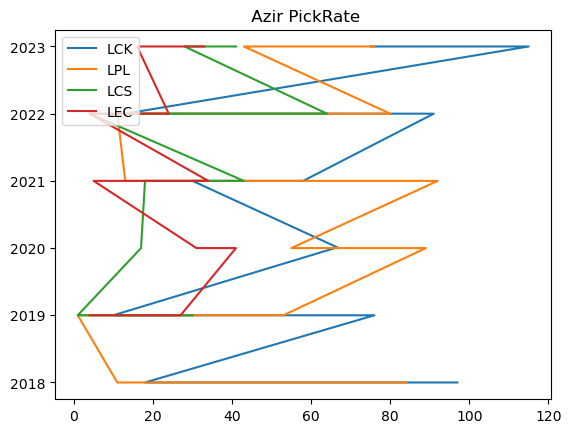

In [40]:
LineChart(LCKData," Azir PickRate","TotalGamesPlayed","Year","LCK")
LineChart(LPLData," Azir PickRate","TotalGamesPlayed","Year","LPL")
LineChart(LCSData," Azir PickRate","TotalGamesPlayed","Year","LCS")
LineChart(LECData," Azir PickRate","TotalGamesPlayed","Year","LEC")


<module 'matplotlib.pyplot' from '/Users/BarneyYuen/anaconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

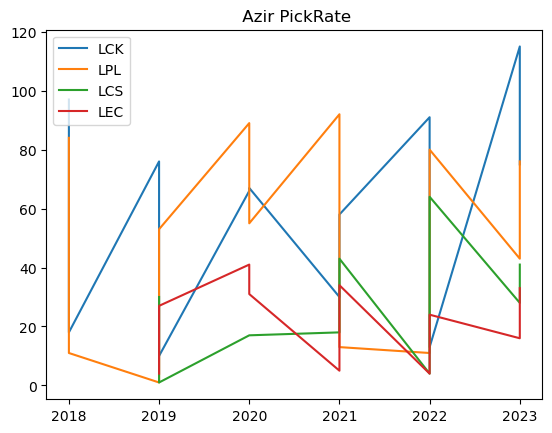

In [41]:
LineChart(LCKData," Azir PickRate","Year","TotalGamesPlayed","LCK")
LineChart(LPLData," Azir PickRate","Year","TotalGamesPlayed","LPL")
LineChart(LCSData," Azir PickRate","Year","TotalGamesPlayed","LCS")
LineChart(LECData," Azir PickRate","Year","TotalGamesPlayed","LEC")
